In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [2]:
# komponenty do budowy sieci
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.random import set_seed

In [3]:
set_seed(0)

In [4]:
ds = load_boston()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df["MEDV"] = ds.target
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
df.to_csv("boston.csv", index=False)

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [7]:
X = df.iloc[: , :-1]
y = df.MEDV

scaler = MinMaxScaler() # normalizacja
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [8]:
model = Sequential()

model.add( Dense(32, input_shape=(13,), activation="relu" ) )
model.add( Dense(4, activation="relu") )
model.add( Dense(1, activation="relu") )

model.compile(optimizer='rmsprop', loss="mse", metrics=["mae"])

result = model.fit(X_train, y_train, epochs=600, verbose=0, validation_split=0.05)

In [9]:
df1 = pd.DataFrame(result.history)
df1.head()

,loss,mae,val_loss,val_mae
0,600.303467,22.591736,513.378418,21.160660
1,584.614258,22.236477,496.714478,20.780546
2,565.958435,21.807800,476.941742,20.303457
3,545.912231,21.308233,456.903412,19.801249
4,524.049194,20.763210,434.523621,19.225086


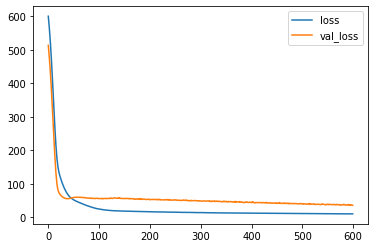

In [10]:
df1[ ["loss","val_loss"] ].plot()

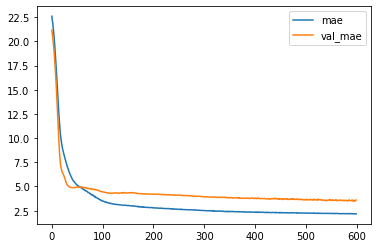

In [11]:
df1[ ["mae","val_mae"] ].plot()

In [12]:
from sklearn.metrics import r2_score

r2_score(y_test, model.predict(X_test) )

0.812295284095335